In [1]:
#importing Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA CLEANING AND OVERVIEW

In [2]:
#Loading datasets
customer_data=pd.read_csv("Customers.csv")
customer_data.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [3]:
product_data=pd.read_csv("Products.csv")
product_data.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [4]:
transaction_data=pd.read_csv("Transactions.csv")
transaction_data.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


In [5]:
#analysing datasets

print("Customer data info:\n")
customer_data.info()
print()
print("Product data info:\n")
product_data.info()
print()
print("Transaction data info:\n")
transaction_data.info()

Customer data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Product data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transaction data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non

In [6]:
#checking for missing values
print(customer_data.isna().sum())
print()

print(product_data.isna().sum())
print()

transaction_data.isna().sum().sort_values(ascending=False)

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64



TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

So here the data has no missing values, hence moving to next step of correcting the data type of date columns

####  *Changing Data Types*

In [9]:
print(customer_data['SignupDate'].dtype,"\n", transaction_data['TransactionDate'].dtype)

object 
 object


In [10]:
customer_data['SignupDate']=pd.to_datetime(customer_data['SignupDate'])
customer_data['SignupDate'].dtype

dtype('<M8[ns]')

In [11]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [12]:
transaction_data['TransactionDate']=pd.to_datetime(transaction_data['TransactionDate'])
transaction_data['TransactionDate'].dtype

dtype('<M8[ns]')

### Exploring data in Customer_data 

In [14]:
#finding no.of unique values in customer data

customer_data.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [15]:
print("Out of total CustomerName",customer_data['CustomerName'].value_counts().sum(),"no. of unique values",customer_data['CustomerName'].nunique())
print("Out of total Region",customer_data['Region'].value_counts().sum(),"no. of unique values",customer_data['Region'].nunique())


Out of total CustomerName 200 no. of unique values 200
Out of total Region 200 no. of unique values 4


In [16]:
customer_data['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

### Exploring data in Product_data

In [18]:
product_data.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [19]:
print("Out of total ProductName",product_data['ProductName'].value_counts().sum(),"no. of unique values",product_data['ProductName'].nunique())
print("Out of total Category",product_data['Category'].value_counts().sum(),"no. of unique values",product_data['Category'].nunique())


Out of total ProductName 100 no. of unique values 66
Out of total Category 100 no. of unique values 4


In [20]:
product_data['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [21]:
product_data.groupby('Category')['Price'].max()

Category
Books          497.76
Clothing       481.78
Electronics    459.86
Home Decor     454.53
Name: Price, dtype: float64

### Exploring transaction_data

In [23]:
transaction_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [24]:
transaction_data['CustomerID'].value_counts()

CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
         ..
C0058     1
C0014     1
C0151     1
C0078     1
C0110     1
Name: count, Length: 199, dtype: int64

In [25]:
transaction_data['ProductID'].value_counts()

ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
        ..
P024     5
P014     4
P031     4
P044     4
P099     4
Name: count, Length: 100, dtype: int64

In [26]:
customer_data['Region'][customer_data['CustomerID']==transaction_data['CustomerID'].value_counts().idxmax()]


108    North America
Name: Region, dtype: object

In [27]:
product_data[['Category','ProductID']][product_data['ProductID']==transaction_data['ProductID'].value_counts().idxmax()] 

,Category,ProductID
58,Clothing,P059


### Summary Statistics

In [29]:
transaction_data.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


## EDA

In [32]:
# Merging datasets

data= transaction_data.merge(product_data).merge(customer_data)
print(data.shape)

data.head(5)

(1000, 12)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15


### 1.  Univariate Analysis

1.  **Which region has the highest number of unique customers?**

    Count unique customers per region

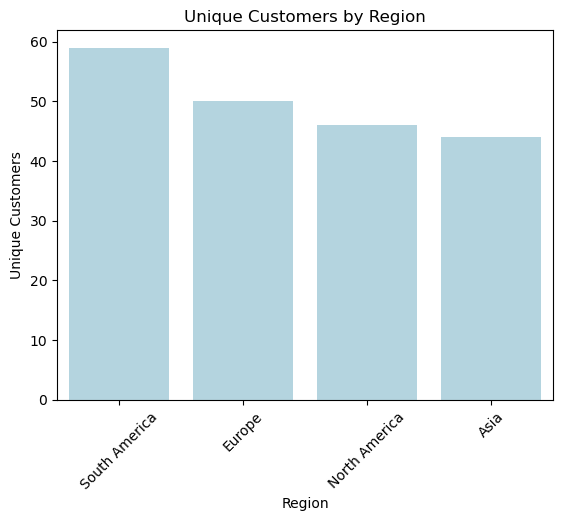

In [123]:
region_customer_count = data.groupby("Region")["CustomerID"].nunique().sort_values(ascending=False)
sns.barplot(x=region_customer_count.index, y=region_customer_count.values,color='lightblue')
plt.xlabel("Region")
plt.ylabel("Unique Customers")
plt.title("Unique Customers by Region")
plt.xticks(rotation=45)
plt.show()

The majority of customers who have completed transactions are from South America, followed by Europe, North America, and Asia.

2.  **Which product is purchased most frequently in terms of quantity?**

    Total quantity sold per product

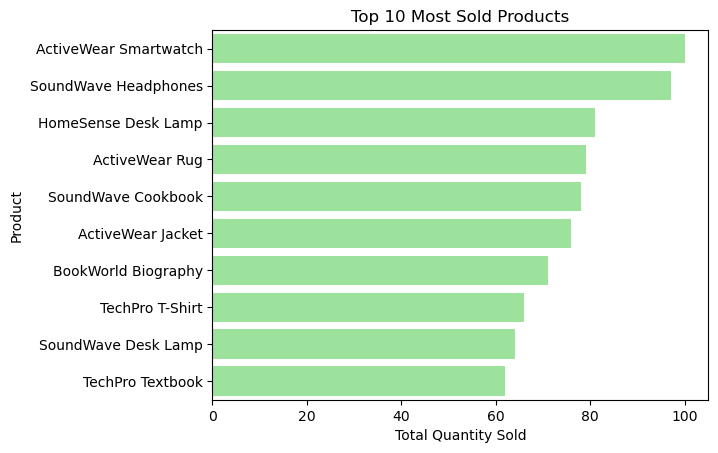

In [139]:
product_quantity = data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
sns.barplot(y=product_quantity.index[:10], x=product_quantity.values[:10], color='lightgreen')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.title("Top 10 Most Sold Products")
plt.show()

3.  **Which month generates the highest revenue?**
    
    Monthly revenue trend

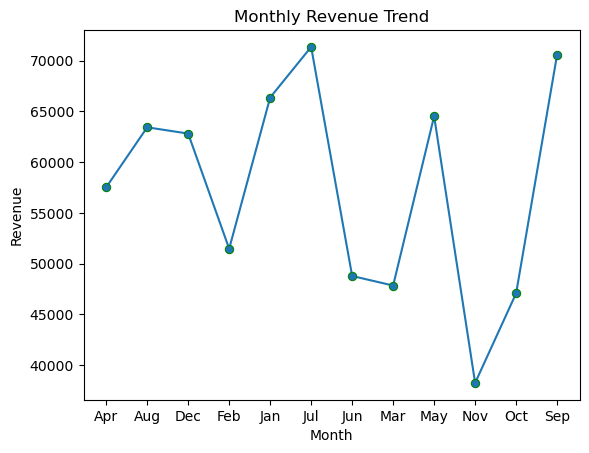

In [152]:
data['Month'] = data['TransactionDate'].dt.strftime('%b')
monthly_revenue = data.groupby("Month")["TotalValue"].sum()
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker="o",mec='g')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend")
plt.show()

### 2.  Bivariate Analysis

4.  **Which product has more demand in each category?**

    Top 5 product in each category

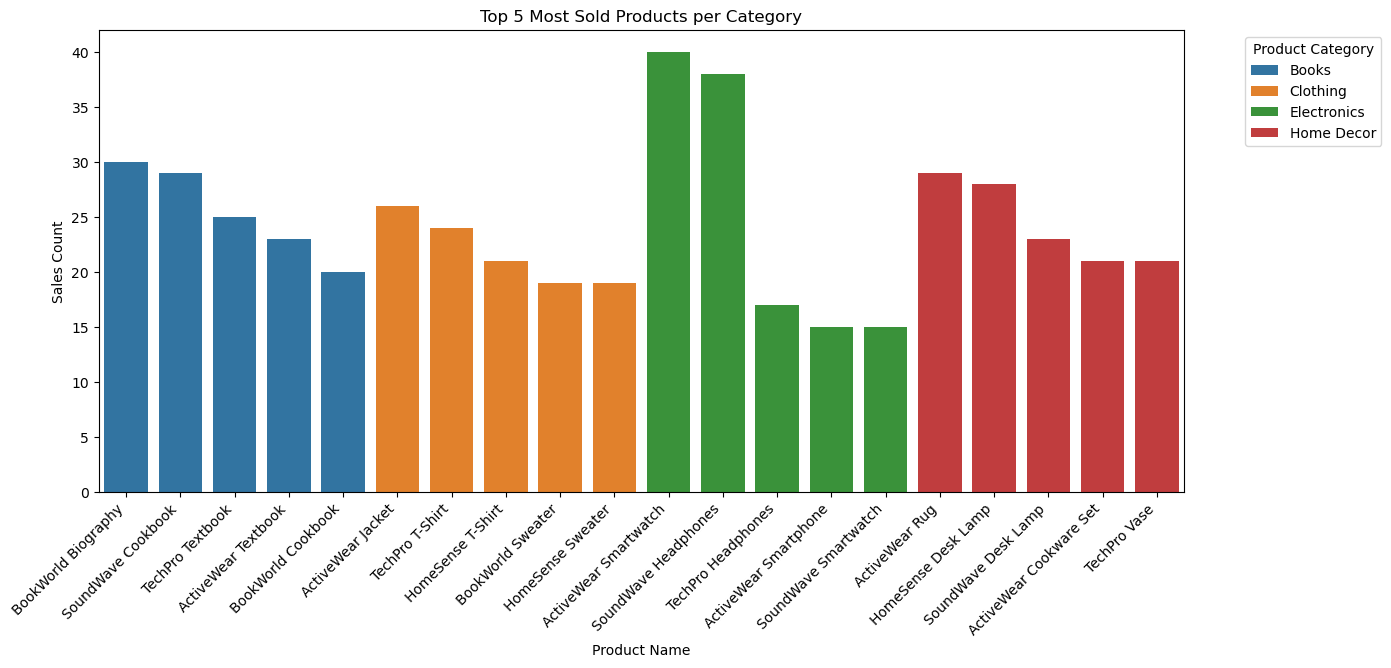

In [135]:
# Get the top 5 most sold products per category
top_products_per_category = (
    data.groupby("Category")["ProductName"]
    .value_counts()
    .groupby(level=0)
    .head(5)
    .reset_index(name="Sales")
)

# Create bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_products_per_category, x="ProductName", y="Sales", hue="Category")

plt.title("Top 5 Most Sold Products per Category")
plt.xlabel("Product Name")
plt.ylabel("Sales Count")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.show()

Each product category has its best-selling items. The top 5 most sold products per category have been visualized in a bar chart for better comparison.

5.  **How do weekend vs. weekday sales compare?**

    Sales comparison for weekdays vs. weekends

<Figure size 1000x500 with 0 Axes>

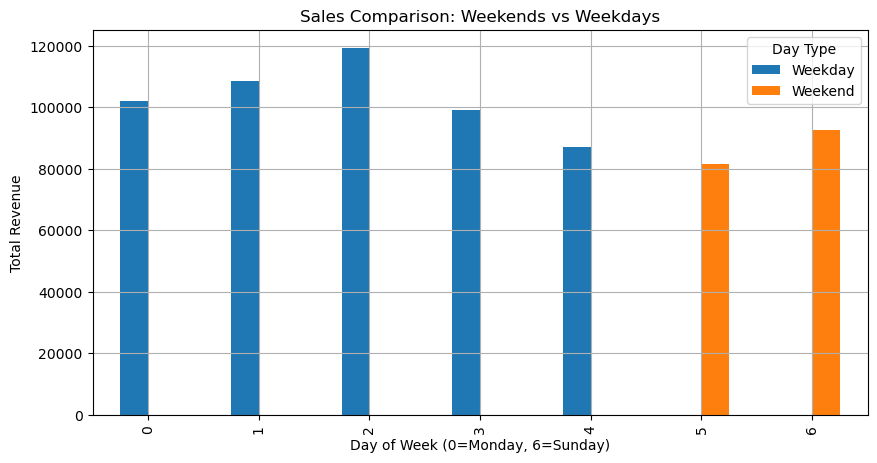

In [43]:
# Sales on Weekends vs Other Days
data['DayOfWeek'] = data['TransactionDate'].dt.dayofweek
data['Weekend'] = data['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
daywise_sales = data.groupby(['Weekend', 'DayOfWeek'])['TotalValue'].sum().unstack()
plt.figure(figsize=(10,5))
daywise_sales.T.plot(kind='bar', figsize=(10,5))
plt.title("Sales Comparison: Weekends vs Weekdays")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Total Revenue")
plt.legend(title="Day Type")
plt.grid()
plt.show()

Sales tend to vary between weekends and weekdays. The visualization shows the distribution of revenue based on day of the week, highlighting key patterns. But there is no significant change between weekday and weekend.

6. **Which product category has demand in each region?**

   Heatmap of product demand across regions

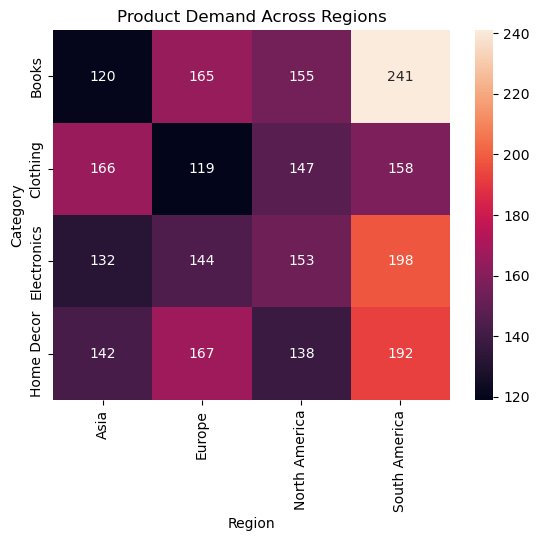

In [167]:
category_region_sales = data.groupby(['Category', 'Region'])['Quantity'].sum().unstack()
sns.heatmap(category_region_sales, annot=True, fmt=".0f")
plt.title("Product Demand Across Regions")
plt.show()

7. **Which category contribute most to total revenue?**

    Revenue by Category

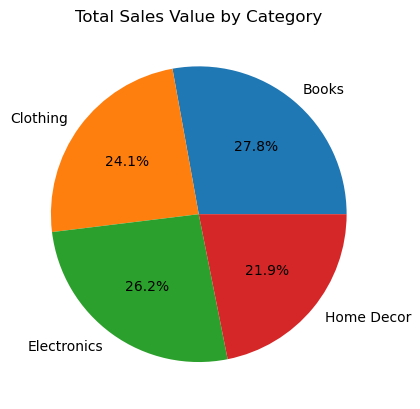

In [38]:
# Calculate total sales by category
total_sales_by_category = data.groupby("Category")["TotalValue"].sum().reset_index()

# Create a bar plot
plt.pie(total_sales_by_category['TotalValue'], labels=total_sales_by_category['Category'], autopct='%1.1f%%')

plt.title("Total Sales Value by Category")
plt.show()

The top-selling product by count is ActiveWear SmartWatch (Electronics category).
By total sales value, the highest revenue-generating category is Books.

8.  **Which region contribute most to total revenue?**

    Revenue per region

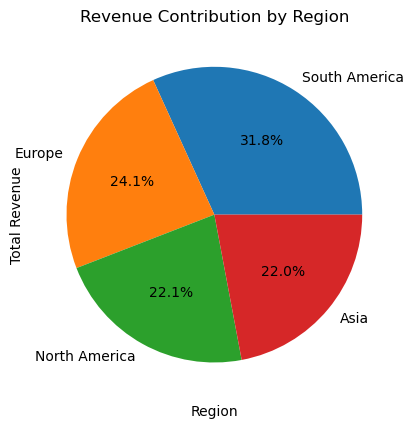

In [178]:
region_revenue = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.pie(region_revenue, labels=region_revenue.index, autopct='%1.1f%%')
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Revenue Contribution by Region")
plt.show()

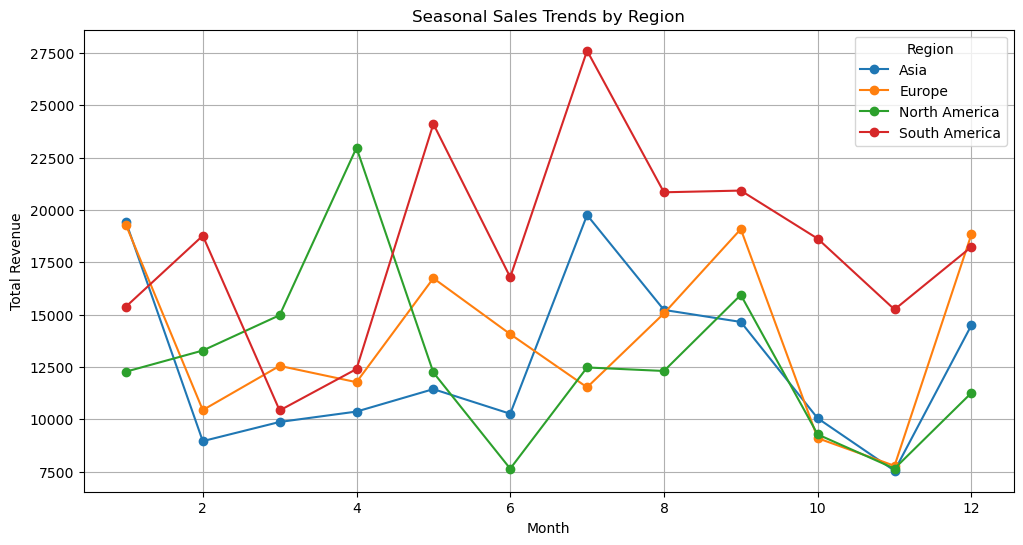

In [47]:
# Seasonal Sales Trends by Region
region_monthly_sales = data.groupby(['Region', 'Month'])['TotalValue'].sum().unstack()
region_monthly_sales.T.plot(figsize=(12,6), marker='o')
plt.title("Seasonal Sales Trends by Region")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.legend(title="Region")
plt.grid()
plt.show()